# <a id='#1'>1. Load libraries and read the data</a>


In [13]:
#!pip3 install --upgrade scikit-learn

## <a id='1.1'>1.1. Load libraries</a>

In [31]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

## <a id='1.2'>1.2. Read the data</a>

In [32]:
data = pd.read_csv('../input/mri-nlp/cleaned_data_H.tsv',sep="\t")

In [33]:
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 

In [34]:
data.head()

,Transcripts,AD
0,there's &um a young boy that's getting a cooki...,1
1,and it he's uh in bad shape because uh the thi...,1
2,and in the picture the mother is washing dishe...,1
3,and the dishes might get falled over if you don't,1
4,fell fall over there there if you don't get it,1


In [35]:
CLASS = 'AD'

In [36]:
df = data

# <a id='3'>3. Data preparation</a>

## <a id='3.1'>3.1. Cut dataset</a>

one for train and test (skf) = 90%, other for validation = 10%

In [37]:
import string

def stem_words(text):
    text = text.split()
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

def clean_data(text):
    sentence = text.lower()
    sentence_no_punct = sentence.translate(table_)
    space_remove = re.sub('\s+',' ', sentence_no_punct)
    return space_remove

table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
string_punctuation_1 = string.punctuation.replace(".","").replace("`","").replace("'","")
table_ = str.maketrans(string_punctuation_1, ' '*len(string_punctuation_1))
printable = set(string.printable)

stemmer = SnowballStemmer('english')
df['Transcripts_cleaned'] = df['Transcripts'].apply(lambda row: clean_data(row) )
df['Transcripts_stem'] = df['Transcripts_cleaned'].apply(lambda row: stem_words(row))
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=5, max_df=0.9) 
X = vectorizer.fit_transform(df['Transcripts_cleaned'].tolist())

In [38]:
X = X.toarray()
y= np.array(df['AD'].tolist())

# Model

In [42]:
print(np.unique(data[CLASS]))
df.shape

[0 1]


(9816, 4)

In [41]:
Y = df[CLASS]
df.shape,X.shape,Y.shape

((9816, 4), (3272, 316), (9816,))

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,
                                                 shuffle=True)

# Modelling basic

In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
def onevsall(y_true,y_pred,mod):
    
    
    global rdf
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc = (tp+tn)/(tp+tn+fp+fn)
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    f1 = 2*rec*pre / (rec +pre)
    sp = tn / (tn +fp)
    #print('Done for '+mod)
    rdf=rdf.append({
            'Model':mod,
            'TN':tn,'FP':fp,'FN':fn,'TP':tp,
            'Accuracy':acc,
            'Precision':pre,
            'Recall or Sensitivity':rec,
            'F1 Score':f1,
            'Specificity':sp
        },ignore_index=True)
        
    return rdf

def roc(clf,x,y):
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    skplt.metrics.plot_roc_curve(clf,x,y)
    plt.savefig('ROC'+model_name+'.jpg')
    plt.show()
    
def visualise(y_true,y_pred,name,model_name):
    ConfusionM = confusion_matrix(y_true,y_pred)

    #print('ROC AUC score:', 
    #multiclass_roc_auc_score(y_true,y_pred, ))
    print(classification_report(y_true,y_pred,   digits=4))
    print()
    fig, ax = plt.subplots(figsize=(6,4)) 
    import seaborn as sns
    sns.heatmap(ConfusionM, annot=True,
            fmt='g',xticklabels=name, yticklabels=name)
    plt.title('Confusion Matrix for '+model_name)
    plt.savefig('CM_'+model_name+'.jpg')
    plt.show()
    return onevsall(y_true,y_pred,model_name)
def run(clf,X_train, y_train,X_test,y_test,viz):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true = y_test
    name = np.unique(y_train)
    #plot_roc_curve(clf, X_test,y_test) 
    if viz:
        return visualise(y_true,y_pred,name,clf.__class__.__name__),clf
    return onevsall(y_true,y_pred,clf.__class__.__name__)
def RNDF(X_train, y_train,X_test,Y_test,viz):
    for clf in tqdm(models_f1):
        #print(clf.__class__.__name__)
        #X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4)
        run(clf,X_train, y_train,X_test,Y_test,viz)
    return rdf

In [45]:


from sklearn import ensemble
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [46]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
from sklearn.ensemble import *
from mlxtend.classifier import StackingClassifier
rdf = pd.DataFrame()
models_f1 = []

models_f1 = []
models_f1.append((LogisticRegression()))
#models.append(('GSearch', LinearDiscriminantAnalysis()))
models_f1.append(( KNeighborsClassifier()))
models_f1.append((DecisionTreeClassifier()))
models_f1.append((MultinomialNB()))
models_f1.append((SVC(kernel="linear", C=0.1,probability=True)))
models_f1.append((RandomForestClassifier()))
models_f1.append((AdaBoostClassifier()))



models_f1 

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='line

In [28]:
np.unique(Y)

array([0, 1])

  0%|          | 0/7 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0     0.7188    0.7132    0.7160       509
           1     0.6939    0.6998    0.6968       473

   micro avg     0.7067    0.7067    0.7067       982
   macro avg     0.7064    0.7065    0.7064       982
weighted avg     0.7068    0.7067    0.7068       982




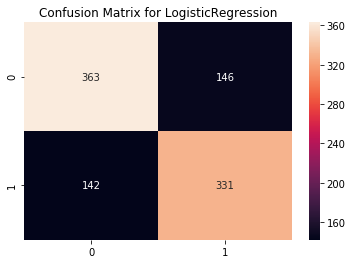

 14%|█▍        | 1/7 [00:00<00:02,  2.14it/s]

              precision    recall  f1-score   support

           0     0.6731    0.7564    0.7123       509
           1     0.6976    0.6047    0.6478       473

   micro avg     0.6833    0.6833    0.6833       982
   macro avg     0.6853    0.6805    0.6800       982
weighted avg     0.6849    0.6833    0.6812       982




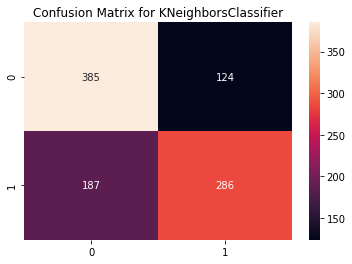

 29%|██▊       | 2/7 [00:01<00:03,  1.32it/s]

              precision    recall  f1-score   support

           0     0.8337    0.8468    0.8402       509
           1     0.8323    0.8182    0.8252       473

   micro avg     0.8330    0.8330    0.8330       982
   macro avg     0.8330    0.8325    0.8327       982
weighted avg     0.8330    0.8330    0.8329       982




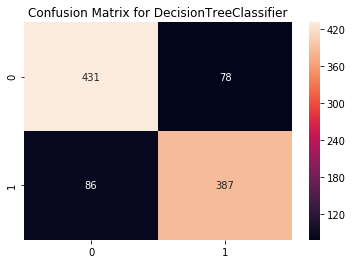

 43%|████▎     | 3/7 [00:02<00:02,  1.47it/s]

              precision    recall  f1-score   support

           0     0.6644    0.7544    0.7065       509
           1     0.6906    0.5899    0.6363       473

   micro avg     0.6752    0.6752    0.6752       982
   macro avg     0.6775    0.6721    0.6714       982
weighted avg     0.6770    0.6752    0.6727       982




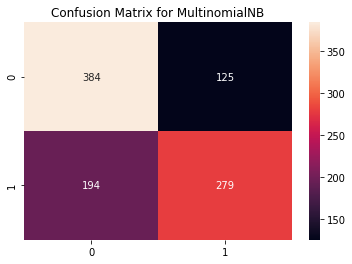

 57%|█████▋    | 4/7 [00:02<00:01,  1.74it/s]

              precision    recall  f1-score   support

           0     0.6203    0.8409    0.7139       509
           1     0.7226    0.4461    0.5516       473

   micro avg     0.6507    0.6507    0.6507       982
   macro avg     0.6714    0.6435    0.6328       982
weighted avg     0.6696    0.6507    0.6358       982




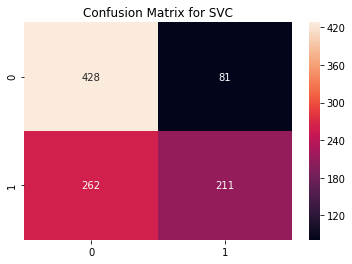

 71%|███████▏  | 5/7 [00:14<00:07,  3.88s/it]

              precision    recall  f1-score   support

           0     0.8429    0.8330    0.8379       509
           1     0.8225    0.8330    0.8277       473

   micro avg     0.8330    0.8330    0.8330       982
   macro avg     0.8327    0.8330    0.8328       982
weighted avg     0.8331    0.8330    0.8330       982




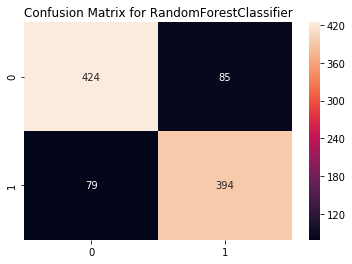

 86%|████████▌ | 6/7 [00:14<00:02,  2.85s/it]

              precision    recall  f1-score   support

           0     0.7256    0.4519    0.5569       509
           1     0.5805    0.8161    0.6784       473

   micro avg     0.6273    0.6273    0.6273       982
   macro avg     0.6530    0.6340    0.6176       982
weighted avg     0.6557    0.6273    0.6154       982




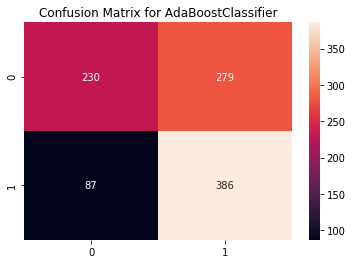

100%|██████████| 7/7 [00:15<00:00,  2.17s/it]


,Accuracy,F1 Score,FN,FP,Model,Precision,Recall or Sensitivity,Specificity,TN,TP
0,0.706721,0.696842,142.0,146.0,LogisticRegression,0.693920,0.699789,0.713163,363.0,331.0
1,0.683299,0.647792,187.0,124.0,KNeighborsClassifier,0.697561,0.604651,0.756385,385.0,286.0
2,0.832994,0.825160,86.0,78.0,DecisionTreeClassifier,0.832258,0.818182,0.846758,431.0,387.0
3,0.675153,0.636260,194.0,125.0,MultinomialNB,0.690594,0.589852,0.754420,384.0,279.0
4,0.650713,0.551634,262.0,81.0,SVC,0.722603,0.446089,0.840864,428.0,211.0
5,0.832994,0.827731,79.0,85.0,RandomForestClassifier,0.822547,0.832981,0.833006,424.0,394.0
6,0.627291,0.678383,87.0,279.0,AdaBoostClassifier,0.580451,0.816068,0.451866,230.0,386.0


In [47]:
from tqdm import tqdm
RNDF(X_train, Y_train,X_test, Y_test,True)

# Monte Carlo Probability Sampling Testing

In [ ]:
# models_f1 is already trained

In [53]:
from sklearn.model_selection import ShuffleSplit
montecarlo_rns = ShuffleSplit(n_splits=100, test_size=0.20, random_state=0)
j = 1
montedf = pd.DataFrame()
for _, test_index in tqdm(montecarlo_rns.split(X)):
    X_t = X[test_index]
    Y_t = y[test_index]
    rdf = pd.DataFrame()
    for clf in models_f1:
        y_pred = clf.predict(X_t)
        onevsall(Y_t,y_pred,clf.__class__.__name__)
    rdf['Monte_Carlo_iteration']='Iteration_'+str(j)
    montedf = pd.concat([montedf,rdf])
    j = j + 1

100it [02:19,  1.38s/it]


In [54]:
print(montedf.shape)
montedf

(700, 11)


,Accuracy,F1 Score,FN,FP,Model,Precision,Recall or Sensitivity,Specificity,TN,TP,Monte_Carlo_iteration
0,0.760305,0.759571,75.0,82.0,LogisticRegression,0.751515,0.767802,0.753012,250.0,248.0,Iteration_1
1,0.764885,0.742475,101.0,53.0,KNeighborsClassifier,0.807273,0.687307,0.840361,279.0,222.0,Iteration_1
2,0.891603,0.887480,43.0,28.0,DecisionTreeClassifier,0.909091,0.866873,0.915663,304.0,280.0,Iteration_1
3,0.725191,0.705882,107.0,73.0,MultinomialNB,0.747405,0.668731,0.780120,259.0,216.0,Iteration_1
4,0.674809,0.598870,164.0,49.0,SVC,0.764423,0.492260,0.852410,283.0,159.0,Iteration_1
5,0.906870,0.905426,31.0,30.0,RandomForestClassifier,0.906832,0.904025,0.909639,302.0,292.0,Iteration_1
6,0.703817,0.741333,45.0,149.0,AdaBoostClassifier,0.651054,0.860681,0.551205,183.0,278.0,Iteration_1
0,0.714504,0.705512,94.0,93.0,LogisticRegression,0.706625,0.704403,0.724036,244.0,224.0,Iteration_2
1,0.735878,0.706282,110.0,63.0,KNeighborsClassifier,0.767528,0.654088,0.813056,274.0,208.0,Iteration_2
2,0.896183,0.892405,36.0,32.0,DecisionTreeClassifier,0.898089,0.886792,0.905045,305.0,282.0,Iteration_2


In [58]:
montedf.to_csv('CV_ML.csv')

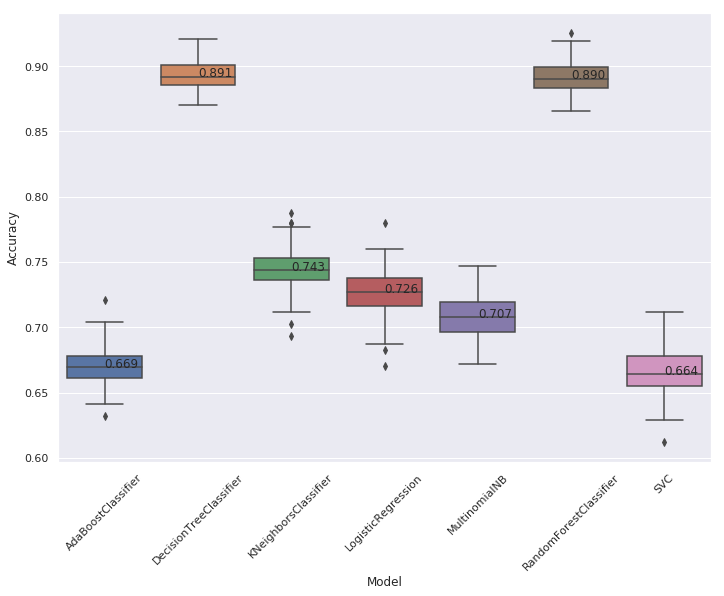

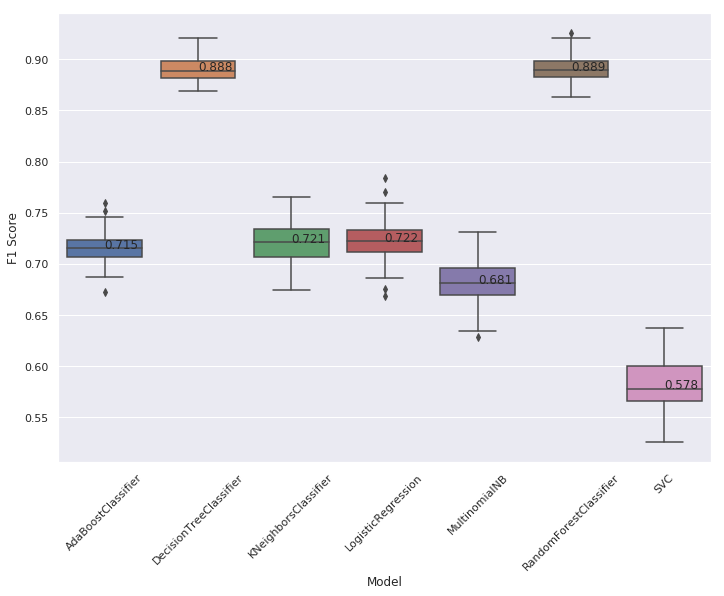

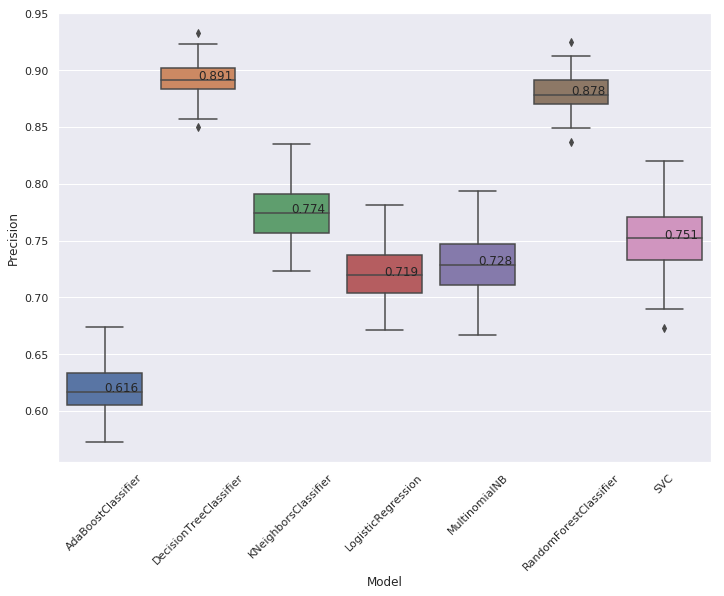

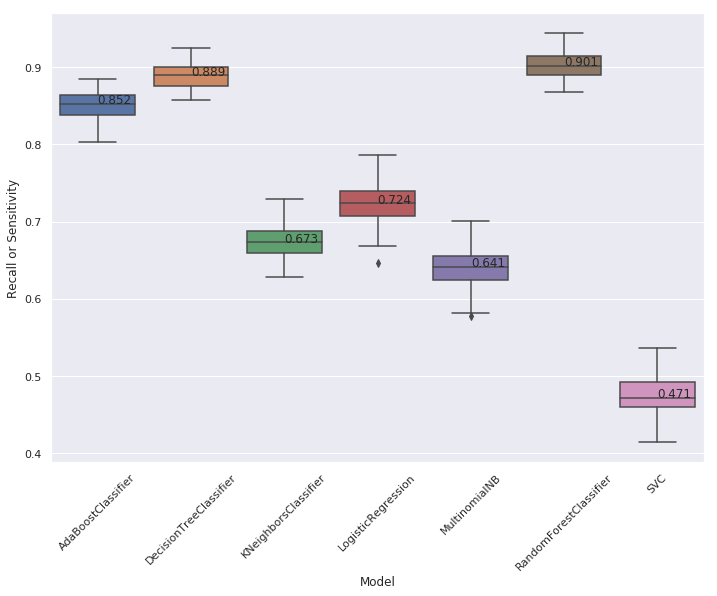

<Figure size 842.4x595.44 with 0 Axes>

In [63]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
for param in ['Accuracy', 'F1 Score', 'Precision',
       'Recall or Sensitivity',]:
    monteX = montedf.sort_values(by=['Model'], ascending=False)
    medians = monteX.groupby(['Model'])[param].median().reset_index()
    Order = list(medians['Model'])
    box = sns.boxplot(x="Model", y=param,order = Order,
                     data=montedf, linewidth=1.5)
    for i in range(len(medians[param])):
        box.annotate(str(medians.iloc[i][param])[:5],xy = (i,medians.iloc[i][param]), horizontalalignment='ceter')
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig('CV_mean_'+param+'.jpg')

# best classifier     

In [59]:
op = pd.DataFrame(montedf.groupby(['Model'])['Accuracy', 'F1 Score', 'Precision',
       'Recall or Sensitivity', 'Specificity'].mean().reset_index())
op.to_csv('CV_mean.csv')
op

,Model,Accuracy,F1 Score,Precision,Recall or Sensitivity,Specificity
0,AdaBoostClassifier,0.671008,0.716620,0.619559,0.850428,0.498867
1,DecisionTreeClassifier,0.893221,0.890650,0.892676,0.888849,0.897456
2,KNeighborsClassifier,0.743969,0.720489,0.773667,0.674603,0.810556
3,LogisticRegression,0.727313,0.721981,0.720588,0.723893,0.730600
4,MultinomialNB,0.707542,0.681558,0.729535,0.639972,0.772363
5,RandomForestClassifier,0.891710,0.890621,0.880225,0.901490,0.882334
6,SVC,0.665969,0.581783,0.751270,0.475161,0.849091


In [66]:
import os
os.listdir('./')

['CV_mean_F1 Score.jpg',
 'CM_MultinomialNB.jpg',
 '__notebook_source__.ipynb',
 'CM_SVC.jpg',
 'CM_KNeighborsClassifier.jpg',
 'CM_AdaBoostClassifier.jpg',
 'CM_LogisticRegression.jpg',
 'CV_mean.csv',
 'CV_ML.csv',
 'CV_mean_Accuracy.jpg',
 'CM_DecisionTreeClassifier.jpg',
 'CM_RandomForestClassifier.jpg',
 'CV_mean_Precision.jpg',
 'CV_mean_Recall or Sensitivity.jpg']

In [70]:
!ln -s ~/.local/bin/kaggle /usr/bin/kaggle

In [71]:
! sudo apt-get install zip

/bin/sh: 1: sudo: not found


In [72]:
!zip -r ML_CV_algo.zip ./

/bin/sh: 1: zip: not found
